<a href="https://colab.research.google.com/github/Nisha40108/ADVANCED-MACHINE-LEARNING-64061-/blob/main/Assignment_4_Text%26Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 - Text and Sequence Data using IMDB dataset**

# **Name: Nisha Chaurasia**

# **Date: 11-26-2023**

In [4]:
!pip install tensorflow==2.12

**Loading the important libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

**Importing TensorFlow and Keras:**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

#### Considering the IMDB example from Chapter 6. Re-running the example and modifying the  by **implementing a cutoff for reviews after 150 words, Training Sample - 100, Validation Sample - 10000, Consider only the top 10,000 words**

### **Model 1: Basic model from scratch**

In [34]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [35]:
train_texts.shape

(100, 150)

In [36]:
val_texts.shape

(10000, 150)

In [37]:
test_texts.shape

(5000, 150)

**Model Building**

In [38]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


**Model Execution**

In [39]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model1.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_1 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
4/4 [==============================] - 2s 345ms/step - loss: 0.6954 - accuracy: 0.4900 - val_loss: 0.6934 - val_accuracy: 0.4995
Epoch 2/30
4/4 [==============================] - 1s 276ms/step - loss: 0.6728 - accuracy: 0.8300 - val_loss: 0.6934 - val_accuracy: 0.5008
Epoch 3/30
4/4 [==============================] - 1s 288ms/step - loss: 0.6573 - accuracy: 0.9200 - val_loss: 0.6934 - val_accuracy: 0.5005
Epoch 4/30
4/4 [==============================] - 1s 289ms/step - loss: 0.6434 - accuracy: 0.9900 - val_loss: 0.6934 - val_accuracy: 0.5006
Epoch 5/30
4/4 [==============================] - 1s 293ms/step - loss: 0.6301 - accuracy: 0.9900 - val_loss: 0.6933 - val_accuracy: 0.5022
Epoch 6/30
4/4 [==============================] - 1s 261ms/step - loss: 0.6170 - accuracy: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.5034
Epoch 7/30
4/4 [==============================] - 1s 269ms/step - loss: 0.6034 - accuracy: 1.0000 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 8/30
4/4 [====

**Ploating the Accuracy and loss for training and validation**

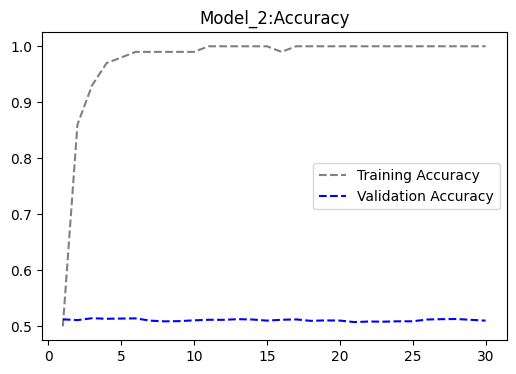

<Figure size 640x480 with 0 Axes>

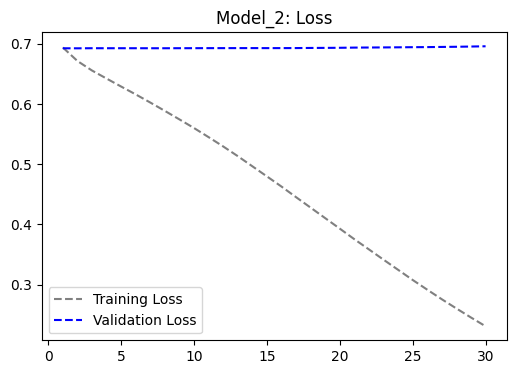

In [32]:
accuracy = Model_1.history['accuracy']
val_accuracy = Model_1.history['val_accuracy']

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_1:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_1: Loss")
plt.legend()
plt.show()

In [33]:
test_model = load_model('model1.h5')
Model1_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

157/157 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5084
Loss: 0.693
Accuracy: 0.508


The model with 100 training samples which was built with just an embedding layer resulted in 51.7% Accuracy, which is not that bad because the model was just trained with 100 Samples.

### **Model 2: Increasing the training sample to 1000 and with Embedding Layer**

In [40]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=10000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [41]:
train_texts.shape

(10000, 150)

In [42]:
val_texts.shape

(10000, 150)

In [43]:
test_texts.shape

(5000, 150)

In [46]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 2s 8ms/step - loss: 0.2305 - accuracy: 0.9164 - val_loss: 0.3186 - val_accuracy: 0.8652
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1945 - accuracy: 0.9321 - val_loss: 0.3161 - val_accuracy: 0.8648
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 0.1650 - accuracy: 0.9440 - val_loss: 0.3175 - val_accuracy: 0.8640
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1400 - accuracy: 0.9557 - val_loss: 0.3195 - val_accuracy: 0.8671
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 0.1178 - accuracy: 0.9647 - val_loss: 0.3244 - val_accuracy: 0.8639
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 0.0979 - accuracy: 0.9710 - val_loss: 0.3346 - val_accuracy: 0.8602
Epoch 7/30
313/313 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9796 - val_loss: 0.3431 - val_accuracy: 0.8618
Epoch 

In [ ]:
accuracy = Model_2.history['accuracy']
val_accuracy = Model_2.history['val_accuracy']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_2:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_2: Loss")
plt.legend()
plt.show()

In [ ]:
test_model = load_model('model2.h5')
Model2_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')